In [20]:
from scipy.stats import shapiro 
from scipy.stats import wilcoxon
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

#All libraries needed are imported 

In [21]:
#Example file is opened in read mode, in this case energy file from 1ELR structure, which contain 
#information about the Coulombic and Lennard-Jones energies over time between carboxylate clamp residues and Hsp90 peptide
#All the values are put into the empty lists created 

Time_energies2 = []
Coul_SR2 = []
LJ_SR2 = []

with open('interaction_energy_1ELR_clamp_ligand.xvg', 'r') as f:
    for line in f:
        if line.startswith(('@', '#')):
            continue
        columns = line.split()
        Time_energies2.append(float(columns[0]))
        Coul_SR2.append(float(columns[1]))
        LJ_SR2.append(float(columns[2]))



In [22]:
#Shapiro test is done simpy by using the shapiro function from the scipy.stats library
#P-value is lower than 0.05, which means the Null hypothesis is rejected and the data comes from non normal distribution

shapiro(Coul_SR2)

ShapiroResult(statistic=0.9950960395266231, pvalue=0.0025670572383318904)

In [23]:
#In order to run Wilcoxon and Spearman tests, the data have to be transferred into Numpy arrays

energy_COUL_array = np.array(Coul_SR2)
energy_LJ_array = np.array(LJ_SR2)

In [24]:
#Same like for Shapiro test, there are wilcoxon and spearmanr functions for both tests. In both cases
#p-values are lower than 0.05, which means the Null hypothesis is rejected and the energy data is significantly different
#from each other, but there is also significant relation between data points of the two energies.

wilcoxon(energy_COUL_array, energy_LJ_array)

WilcoxonResult(statistic=0.0, pvalue=2.284688634129981e-165)

In [25]:
spearmanr(energy_COUL_array, energy_LJ_array)

SignificanceResult(statistic=-0.6622669665663677, pvalue=2.2028372012320384e-127)

Text(0.5, 1.0, 'QQ-Plot, Coulombic energy distribution over time \n 1ELR, Carboxylate clamp vs. Hsp90 peptide')

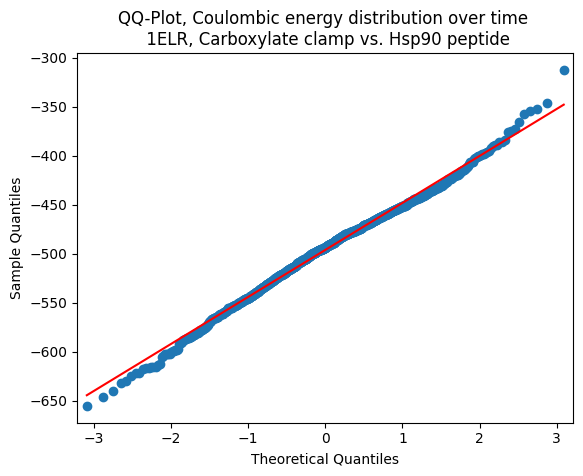

In [29]:
#Lastly, the distribution can be also analysed visually by using QQ plot or Histogram. Below there are two examples showing the distribution plots
#of the data from the file above

sm.qqplot(energy_COUL_array, line='s')
plt.title('QQ-Plot, Coulombic energy distribution over time \n 1ELR, Carboxylate clamp vs. Hsp90 peptide')

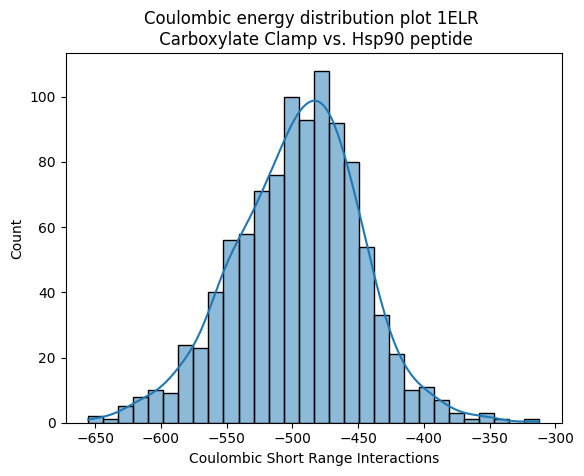

In [30]:
plt.plot(figsize=(6, 10)) 

sns.histplot(energy_COUL_array, bins = 30, kde = True)
plt.xlabel('Coulombic Short Range Interactions')
plt.title('Coulombic energy distribution plot 1ELR \n Carboxylate Clamp vs. Hsp90 peptide')

plt.show()